# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs1/20250227_sparc4acs1_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs1/20250227_s4c1_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs1/20250227_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs1/20250227_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs1/20250227_s4c1_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:49.052000,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:50.172073,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:51.292146,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:52.412219,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:53.532291,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:55:22.396000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,14,L4,None,True
1539,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:57:04.995000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,15,L4,None,True
1540,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:58:47.600000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,16,L4,None,True
1541,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T08:00:30.396000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs1/20250227_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   54R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   54R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   54R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   54R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   54R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

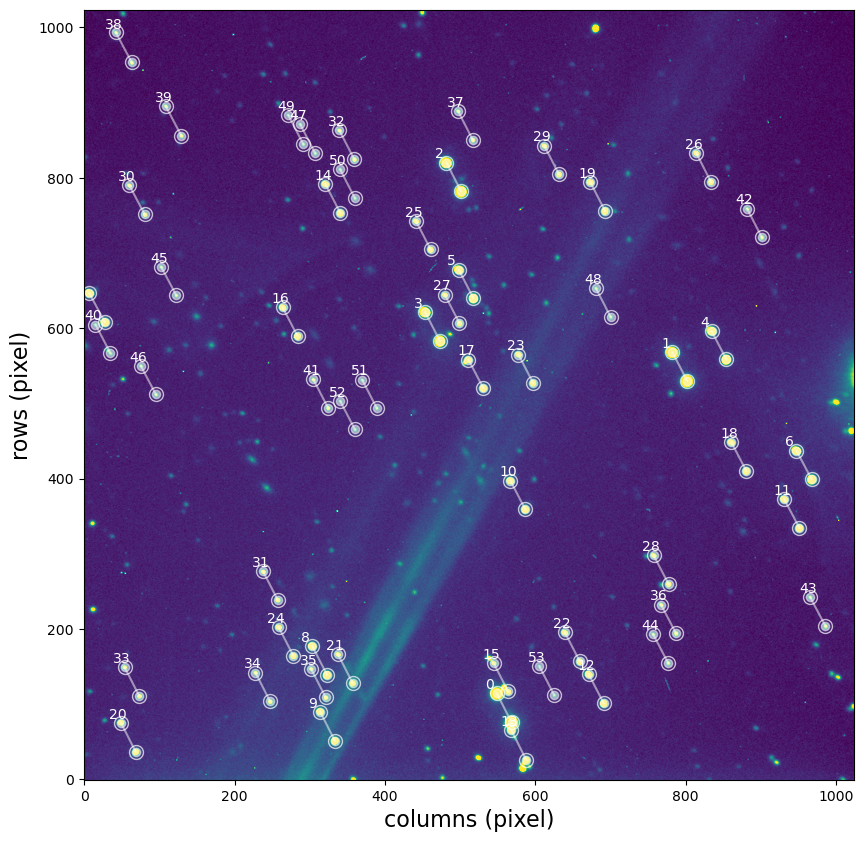

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553075,-38.759757,568.430249,75.855979,5.265951,5.265951,-9.569604,0.001497,-7.864782,0.001184,10,0
1,1,189.527411,-38.716355,801.995648,529.924237,5.676521,5.676521,-9.279069,0.001767,-7.849692,0.001238,10,0
2,2,189.564737,-38.693913,501.291034,781.989840,5.455043,5.455043,-9.084055,0.001976,-7.835462,0.001172,10,0
3,3,189.567116,-38.712646,473.033537,583.240863,5.498429,5.498429,-8.816122,0.002375,-7.860076,0.001563,10,0
4,4,189.521321,-38.713483,853.915285,558.646809,5.643337,5.643337,-8.093382,0.003807,-7.847290,0.001404,10,0
5,5,189.562045,-38.707179,517.635607,639.929387,5.376687,5.376687,-7.942750,0.004231,-7.856101,0.001342,10,0
6,6,189.506957,-38.727929,967.377111,399.106429,5.712710,5.712710,-7.853244,0.004629,-7.869289,0.001634,10,0
7,7,189.620775,-38.712016,27.366928,608.151751,5.329113,5.329113,-7.737508,0.004679,-7.747258,0.001056,10,0
8,8,189.582839,-38.754810,322.824752,139.206505,5.135993,5.135993,-7.374662,0.007401,-7.899326,0.002500,10,0
9,9,189.581146,-38.762940,333.238666,51.588797,5.097472,5.097472,-6.970879,0.011221,-7.926816,0.003010,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

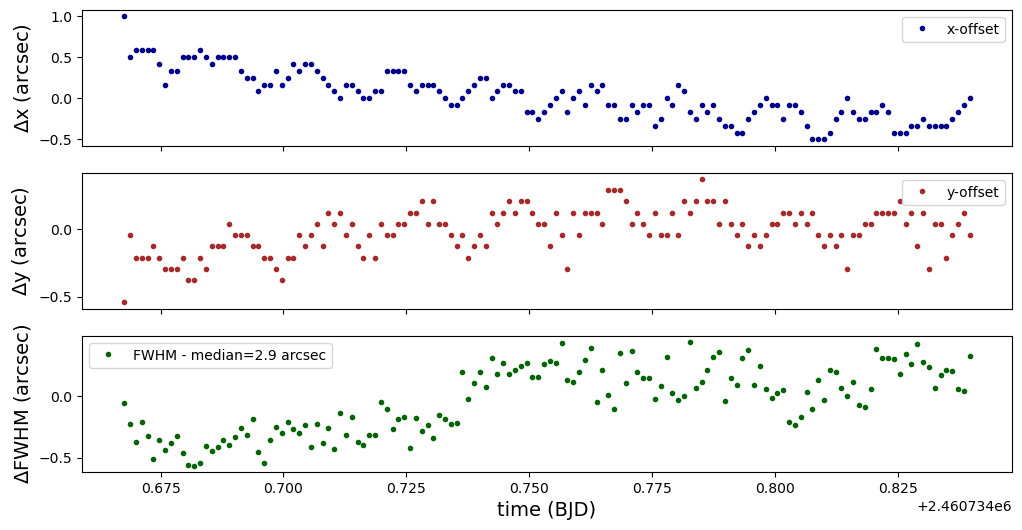

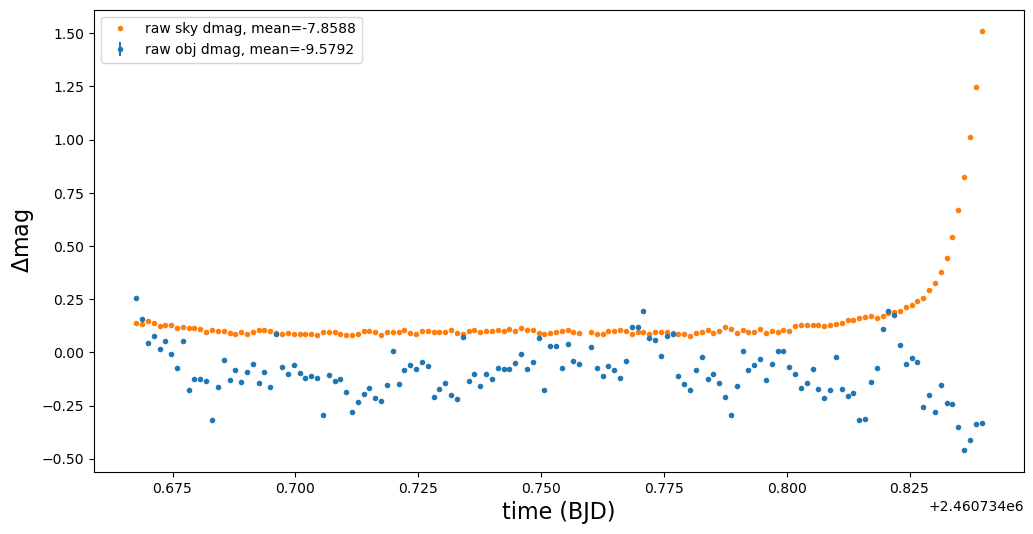

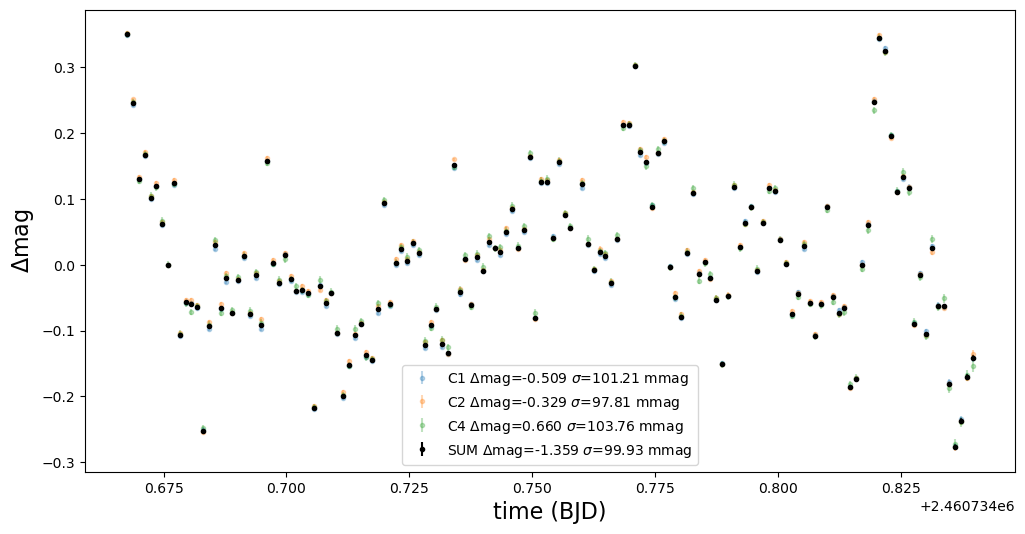

       TIME                x          ...      diffmagsum     
------------------ ------------------ ... --------------------
 2460734.667597344 463.22395532019857 ...   0.3503163908054798
2460734.6687849765 461.72395532019857 ...   0.2459022843780101
2460734.6699720067 461.97395532019857 ...  0.13076852981817133
2460734.6711592227 461.97395532019857 ...  0.16734746562780423
 2460734.672347723 461.97395532019857 ...  0.10135344528828938
  2460734.67353436 461.97395532019857 ...   0.1203640108767452
   2460734.6747197 461.47395532019857 ...   0.0621371281017975
               ...                ... ...                  ...
2460734.8325557634 459.22395532019857 ... -0.06275425417598512
 2460734.833743325 459.22395532019857 ... -0.06314511416982782
2460734.8349285945 459.22395532019857 ... -0.18143722324547085
 2460734.836116156 459.47395532019857 ... -0.27673165281313494
 2460734.837303787 459.72395532019857 ... -0.23702486182344984
2460734.8384936284 459.97395532019857 ... -0.1708335984

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=3
comps=[1,2,4]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs1/20250227_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     903   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1250   54R x 619C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0143,EFE0143,FO0144,EFO0144,FE0144,EFE0144,FO0145,EFO0145,FE0145,EFE0145
0,2.0,10.0,0.0,189.553075,-38.759757,548.779455,114.238365,568.430249,75.855979,5.953270,...,7503.518871,16.902601,6180.442984,17.541107,7551.137031,18.108338,6042.280970,18.826041,7385.778976,19.918891
1,2.0,10.0,1.0,189.527411,-38.716355,782.345290,567.827928,801.995648,529.924237,6.380642,...,5422.592987,15.825458,4681.792219,16.914001,5504.243567,17.129397,4589.020907,18.449374,5388.467507,18.700352
2,2.0,10.0,2.0,189.564737,-38.693913,481.774264,820.143663,501.291034,781.989840,6.123338,...,4652.682934,15.167306,3960.715239,16.178876,4679.439517,16.512989,3847.048889,17.764398,4556.941580,17.791783
3,2.0,10.0,3.0,189.567116,-38.712646,453.414373,621.299178,473.033537,583.240863,6.134431,...,2673.214226,14.843362,2581.033416,15.803528,2867.047995,16.093743,2587.309541,17.736068,2890.835166,17.781452
4,2.0,10.0,4.0,189.521321,-38.713483,834.388434,596.287129,853.915285,558.646809,6.295816,...,1889.580695,15.083317,1559.512401,16.052179,1904.381613,16.344443,1555.196844,18.119586,1883.239354,18.278577
5,2.0,10.0,5.0,189.562045,-38.707179,498.144388,677.804958,517.635607,639.929387,6.036949,...,1576.540189,14.728237,1384.005124,15.554470,1603.446024,15.912077,1360.174553,17.219060,1560.318028,17.821936
6,2.0,10.0,6.0,189.506957,-38.727929,947.307114,437.227481,967.377111,399.106429,6.383808,...,1469.798041,14.523811,1217.201375,16.101447,1469.362403,15.899014,1242.276223,17.785162,1399.220487,17.559446
7,2.0,10.0,7.0,189.620775,-38.712016,6.844926,646.636572,27.366928,608.151751,5.787471,...,1165.757002,13.529973,1032.130925,12.964127,1221.820593,14.823362,992.411700,14.567160,1161.293278,16.645939
8,2.0,10.0,8.0,189.582839,-38.754810,303.334545,177.361894,322.824752,139.206505,5.787946,...,909.437222,14.555976,784.853787,15.928877,909.578006,16.045640,768.077177,17.675629,881.030354,17.888817
9,2.0,10.0,9.0,189.581146,-38.762940,313.729581,90.111722,333.238666,51.588797,5.867755,...,656.664654,14.890286,543.848440,16.026364,637.261773,16.584620,503.466990,17.833301,644.172279,17.971847


Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0143', 'EFE0143', 'FO0144', 'EFO0144', 'FE0144', 'EFE0144', 'FO0145',
       'EFO0145', 'FE0145', 'EFE0145'],
      dtype='object', length=619)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:40:31,385 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:40:31,385 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:40:31,398 root - INFO - Source index: i=3   [pipeline_lib]


2025-09-18 00:40:31,398 | INFO | Source index: i=3 


2025-09-18 00:40:31,399 root - INFO - Source RA=189.5671161715044 Dec=-38.712646237734795 mag=-15.0790+-0.0004  [pipeline_lib]


2025-09-18 00:40:31,399 | INFO | Source RA=189.5671161715044 Dec=-38.712646237734795 mag=-15.0790+-0.0004


2025-09-18 00:40:31,400 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-09-18 00:40:31,400 | INFO | Best aperture radius: 20.0 pixels


2025-09-18 00:40:31,400 root - INFO - Polarization in Q: -0.0002+-0.0008  [pipeline_lib]


2025-09-18 00:40:31,400 | INFO | Polarization in Q: -0.0002+-0.0008


2025-09-18 00:40:31,401 root - INFO - Polarization in U: 0.000+-0.001  [pipeline_lib]


2025-09-18 00:40:31,401 | INFO | Polarization in U: 0.000+-0.001


2025-09-18 00:40:31,402 root - INFO - Polarization in V: -0.0013+-0.0007  [pipeline_lib]


2025-09-18 00:40:31,402 | INFO | Polarization in V: -0.0013+-0.0007


2025-09-18 00:40:31,403 root - INFO - Total linear polarization p: 0.000+-0.001  [pipeline_lib]


2025-09-18 00:40:31,403 | INFO | Total linear polarization p: 0.000+-0.001


2025-09-18 00:40:31,404 root - INFO - Angle of polarization theta: 100+-100 deg  [pipeline_lib]


2025-09-18 00:40:31,404 | INFO | Angle of polarization theta: 100+-100 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:40:31,406 root - INFO - Free constant k: 0.8737071452288674+-0.0  [pipeline_lib]


2025-09-18 00:40:31,406 | INFO | Free constant k: 0.8737071452288674+-0.0


2025-09-18 00:40:31,407 root - INFO - Zero of polarization: 28.2+-0.0  [pipeline_lib]


2025-09-18 00:40:31,407 | INFO | Zero of polarization: 28.2+-0.0


2025-09-18 00:40:31,408 root - INFO - RMS of zi residuals: 0.00573310240421452  [pipeline_lib]


2025-09-18 00:40:31,408 | INFO | RMS of zi residuals: 0.00573310240421452


2025-09-18 00:40:31,408 root - INFO - Reduced chi-square (n=146.0, DOF=143.0): 2.13  [pipeline_lib]


2025-09-18 00:40:31,408 | INFO | Reduced chi-square (n=146.0, DOF=143.0): 2.13


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:40:31,489 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:40:31,489 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:40:31,495 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:40:31,495 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:40:31,715 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:40:31,715 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:40:31,720 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:40:31,720 | INFO | Substituting symbol \perp from STIXGeneral


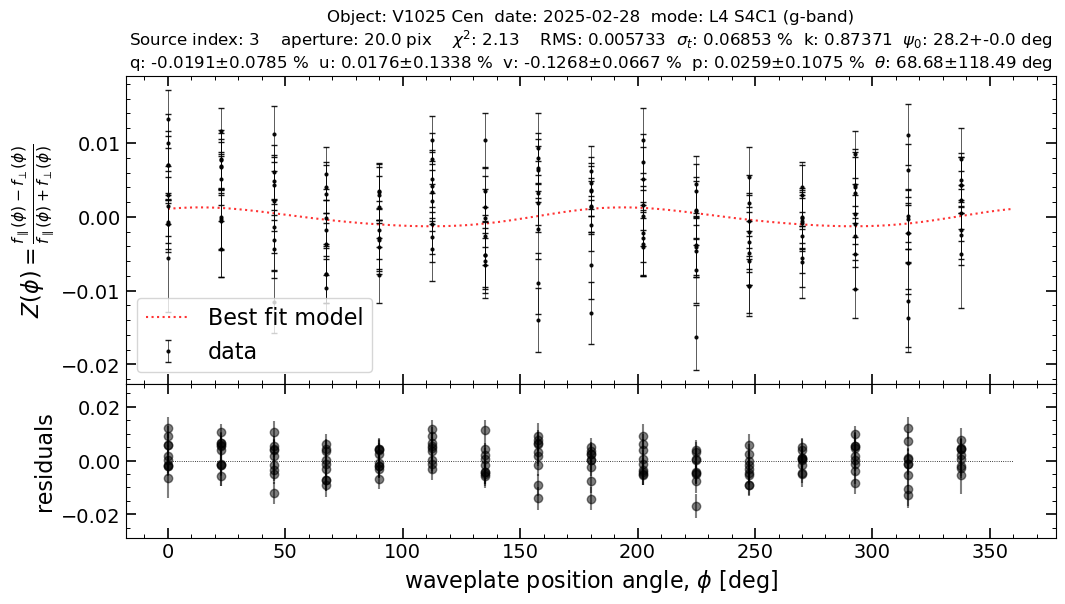

In [11]:
source_index = 3

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs1/20250227_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 3
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 6
APERTURE_RADIUS : 20.0
NEXPS : 146
MAG : -15.0790+-0.0004
RA : 189.5671161715044
DEC : -38.712646237734795
FWHM : 6.134430657042271
X1 : 453.4143733548857
Y1 : 621.2991783704605
X2 : 473.0335372855115
Y2 : 583.2408631996065
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.0+-0.1 %  Angle of polarization: 100+-100 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

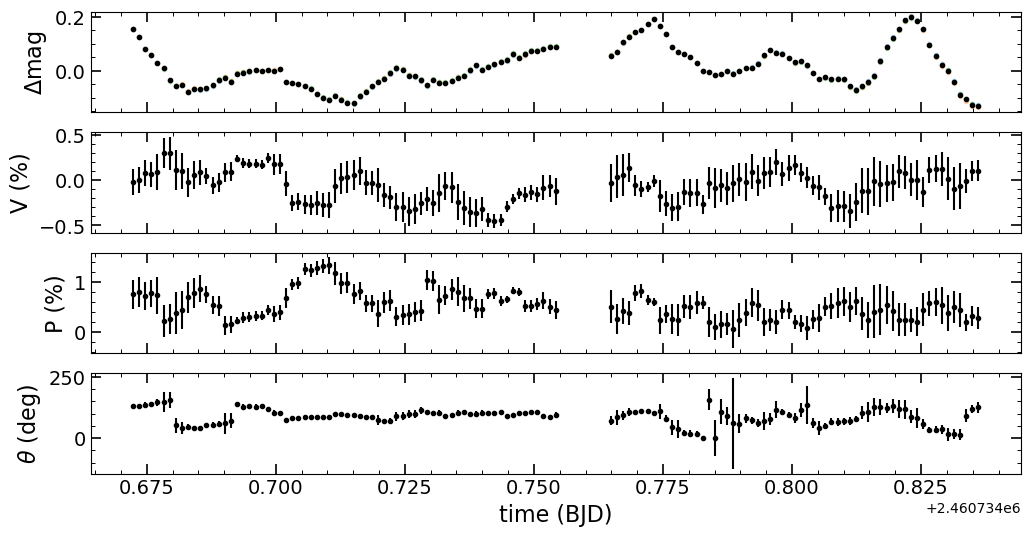

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.15421153112744435,0.0009951461975069098,0.15513829498503995,0.00104226012612908,0.15472517937850228,0.001762670597715118,2460734.6723298384,453.4143733548857,621.2991783704605,473.0335372855115,583.2408631996065,5.424474989758197,-12.007016770581496,0.00079097543639798,-13.214487802431664,0.0018184343095161604,0.15470586500702233,0.007467240227294072,0.0028955236764155686,129.74553885711157,11.09003790219484
0.12324948166658523,0.001007058391721032,0.12471199615525208,0.001053893139218109,0.12380617143524653,0.0017628196481819802,2460734.6735174246,451.9143733548857,622.7991783704605,471.5335372855115,584.7408631996065,5.406943981273151,-11.978843191164774,0.0008070691869960011,-13.21706261152967,0.0018106099655773556,0.12395747649229527,0.007942913943525575,0.0029221541435588824,129.19878319961785,10.521781942999212
0.08049722320598818,0.0010279611879390788,0.08136574709322097,0.0010729889823810682,0.0809058731527017,0.0017709651107862758,2460734.6747049,452.1643733548857,622.2991783704605,471.7835372855115,584.2408631996065,5.398147448595141,-11.938094678859768,0.0008337158819282398,-13.219318871237844,0.0018052923498714495,0.08095270447911496,0.0071261371635342515,0.002824241440171346,135.1934725223753,11.334795182196645
0.05751479501946655,0.001036835618290544,0.05864643753258214,0.0010814719740342544,0.05821119348647308,0.0017762959187102537,2460734.67589115,452.1643733548857,622.2991783704605,471.7835372855115,584.2408631996065,5.367766117860709,-11.917040205485794,0.0008455960157712289,-13.221100364025034,0.001804089536342267,0.05811673831795083,0.007690003095304342,0.0027140660679650383,137.39450766017936,10.093921755531895
0.029272348711101515,0.0010489368048033874,0.030396172501438556,0.0010926307137930666,0.02792169362697905,0.001775368102707582,2460734.677080321,452.1643733548857,622.2991783704605,471.7835372855115,584.2408631996065,5.253164269468625,-11.891365130988458,0.0008617081770055519,-13.223989762614664,0.001793995331753099,0.02955226523098453,0.007278430449010256,0.003718968558054484,146.60799099531218,14.613384232423593
0.008688629392551661,0.0010578144124207122,0.00970882058876299,0.0011009132636816074,0.006989051018265968,0.0017797701999283926,2460734.6782677043,452.1643733548857,622.5491783704605,471.7835372855115,584.4908631996065,5.150392716583642,-11.872774922950793,0.0008735054344548324,-13.226077722335983,0.001791515581222178,0.008874097472000742,0.0022206203760278664,0.003153343200733252,145.81841135134061,40.61280195144858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.024217822693538338,0.0012118691855730057,0.018412340934895965,0.0012578201042778806,0.022323306642968888,0.0020737549357629052,2460734.8289825968,449.1643733548857,623.2991783704605,468.7835372855115,585.2408631996065,6.753309948493917,-11.783441839128866,0.0010021417036399206,-13.123887009755432,0.0020828667477169635,0.021731726230624915,0.005327392518785402,0.003634668543370929,35.48275946260458,19.512645252598844
0.0018868885248721767,0.001242954492648935,-0.0040094479861458865,0.0012890049400219126,0.001520511274225811,0.0021131213669393543,2460734.830169013,449.1643733548857,623.5491783704605,468.7835372855115,585.4908631996065,6.633814666458305,-11.759705487113143,0.0010337584659898032,-13.122279122742242,0.0021132396502990232,-0.00039673877190793405,0.003872388502772275,0.003554395180829477,16.331116524713575,26.25142133826368


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=3, 
                             comps=[1,2,4], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)